### **6.5: Unsupervised Machine Learning: Clustering**

### **Contents**
1. Importing libraries and data
2. Preparing Data
3. The Elbow Technique
4. k-means Clustering
5. Summary

### **1. Importing libraries and data**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans      # Import the k-means algorithm from scikit-learn.
import pylab as pl                      # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Option to ensure to display in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create data path

path = r'/Users/anjanpakhrin/Documents/US Accidents Analysis 2016-2023'

In [4]:
# Importing cleaned DataFrame from previous step

df_accidents = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_accidents_6-3.pkl'))

In [5]:
# Display shape of DataFrame

df_accidents.shape

(7477440, 29)

In [6]:
# Display first 5 rows

df_accidents.head()

,id,source,severity,start_time,end_time,distance(mi),state,temperature(f),wind_chill(f),humidity(%),...,astronomical_twilight,month,month_name,day_of_week,accident_day,accident_hour,time_of_day,severity_label,extreme_flag,year
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,Ohio,36.900002,0.000000,91.0,...,Night,2,February,0,Monday,5,Night,Serious,False,2016
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Ohio,37.900002,0.000000,100.0,...,Day,2,February,0,Monday,6,Morning,Moderate,False,2016
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,Ohio,36.000000,33.299999,100.0,...,Day,2,February,0,Monday,6,Morning,Moderate,False,2016
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,Ohio,35.099998,31.000000,96.0,...,Day,2,February,0,Monday,7,Morning,Serious,False,2016
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Ohio,36.000000,33.299999,89.0,...,Day,2,February,0,Monday,7,Morning,Moderate,False,2016


### **2. Preparing Data**

#### **- Missing Values**

In [7]:
# Checking missing values
df_accidents.isnull().sum()

id                       0
source                   0
severity                 0
start_time               0
end_time                 0
distance(mi)             0
state                    0
temperature(f)           0
wind_chill(f)            0
humidity(%)              0
pressure(in)             0
visibility(mi)           0
wind_direction           0
wind_speed(mph)          0
precipitation(in)        0
weather_condition        0
sunrise_sunset           0
civil_twilight           0
nautical_twilight        0
astronomical_twilight    0
month                    0
month_name               0
day_of_week              0
accident_day             0
accident_hour            0
time_of_day              0
severity_label           0
extreme_flag             0
year                     0
dtype: int64

**No missing values found**

#### **-Checking Data Types**

In [8]:
# Check data types
df_accidents.dtypes

id                             category
source                         category
severity                          int32
start_time               datetime64[ns]
end_time                 datetime64[ns]
distance(mi)                    float32
state                          category
temperature(f)                  float32
wind_chill(f)                   float32
humidity(%)                     float32
pressure(in)                    float32
visibility(mi)                  float32
wind_direction                 category
wind_speed(mph)                 float32
precipitation(in)               float32
weather_condition              category
sunrise_sunset                 category
civil_twilight                 category
nautical_twilight              category
astronomical_twilight          category
month                             int32
month_name                       object
day_of_week                       int32
accident_day                     object
accident_hour                     int32


#### **-Duplicates Check**

In [9]:
# Check duplicates
dups = df_accidents.duplicated()

In [10]:
# No dups
dups.shape

(7477440,)

**No duplicates found**

#### **- Extreme Values**

Since data has been checked and extremes have been eliminated in previous exercises, this step will be skipped in this exercise.

#### **- Selecting only Numerical Columns**

In [11]:
# Numerical columns
df_numerical = df_accidents.select_dtypes(include='number')
df_numerical.head()

,severity,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),month,day_of_week,accident_hour,year
0,3,0.01,36.900002,0.000000,91.0,29.680000,10.0,7.0,0.02,2,0,5,2016
1,2,0.01,37.900002,0.000000,100.0,29.650000,10.0,7.0,0.00,2,0,6,2016
2,2,0.01,36.000000,33.299999,100.0,29.670000,10.0,3.5,0.00,2,0,6,2016
3,3,0.01,35.099998,31.000000,96.0,29.639999,9.0,4.6,0.00,2,0,7,2016
4,2,0.01,36.000000,33.299999,89.0,29.650000,6.0,3.5,0.00,2,0,7,2016


In [12]:
# Display info
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7477440 entries, 0 to 7728393
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   severity           int32  
 1   distance(mi)       float32
 2   temperature(f)     float32
 3   wind_chill(f)      float32
 4   humidity(%)        float32
 5   pressure(in)       float32
 6   visibility(mi)     float32
 7   wind_speed(mph)    float32
 8   precipitation(in)  float32
 9   month              int32  
 10  day_of_week        int32  
 11  accident_hour      int32  
 12  year               int32  
dtypes: float32(8), int32(5)
memory usage: 427.9 MB


### **2. Elbow Technique**

In [13]:
# Define range
num_cl = range(1, 15)

In [14]:
# Define k-means clusters as assigend above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
# Create score
score = [kmeans[i].fit(df_numerical).score(df_numerical) for i in range(len(kmeans))]

# Display score
score

[-14869955797.306004,
 -8020986519.765596,
 -6064844205.614954,
 -4567658761.251159,
 -3949148212.6283927,
 -3306526552.1387496,
 -2922029651.206335,
 -2608413443.185826,
 -2400995356.5605636,
 -2230429365.7594223,
 -2186869407.832833,
 -1979745941.86063,
 -1860068860.560972,
 -1777373413.2204857]

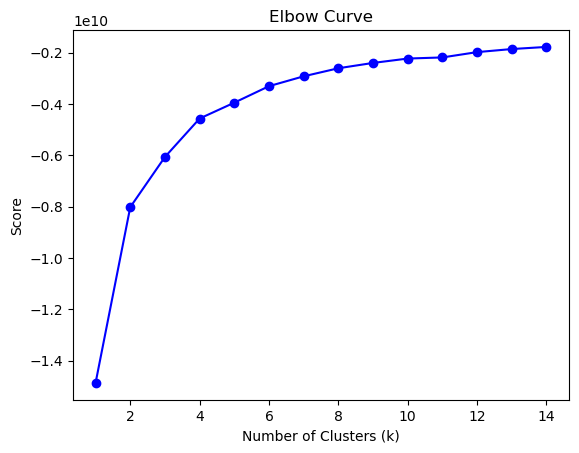

In [16]:
# Plot the elbow curve to visualize improvement vs. k

plt.plot(num_cl, score, 'bo-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.show()

### Choosing the Optimal Number of Clusters (k)
The model was tested for k values from **1 to 15** on the dataset with 7.4M rows. By plotting the negative scores, I observed that the curve shows a clear “elbow” at **k = 3**, after which the curve begins to flatten out. Therefore, I chose **k = 3** as the optimal number of clusters for the K-Means algorithm.

### **4. k-means Clustering**

In [17]:
# Create k-means object

kmeans = KMeans(n_clusters = 3)

In [18]:
# Fit the k-means object to the data

kmeans.fit(df_numerical)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [19]:
# Attach new column with clustering
df_numerical['clusters'] = kmeans.fit_predict(df_numerical)

# Check result
df_numerical.head()

,severity,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),month,day_of_week,accident_hour,year,clusters
0,3,0.01,36.900002,0.000000,91.0,29.680000,10.0,7.0,0.02,2,0,5,2016,2
1,2,0.01,37.900002,0.000000,100.0,29.650000,10.0,7.0,0.00,2,0,6,2016,2
2,2,0.01,36.000000,33.299999,100.0,29.670000,10.0,3.5,0.00,2,0,6,2016,2
3,3,0.01,35.099998,31.000000,96.0,29.639999,9.0,4.6,0.00,2,0,7,2016,2
4,2,0.01,36.000000,33.299999,89.0,29.650000,6.0,3.5,0.00,2,0,7,2016,2


In [20]:
# Bringing labels to original dataset
df_accidents['clusters'] = df_numerical['clusters']

In [21]:
# Quick check
df_accidents.head(2)

,id,source,severity,start_time,end_time,distance(mi),state,temperature(f),wind_chill(f),humidity(%),...,month,month_name,day_of_week,accident_day,accident_hour,time_of_day,severity_label,extreme_flag,year,clusters
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,Ohio,36.900002,0.0,91.0,...,2,February,0,Monday,5,Night,Serious,False,2016,2
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Ohio,37.900002,0.0,100.0,...,2,February,0,Monday,6,Morning,Moderate,False,2016,2


In [22]:
# Count number of observations by cluster

df_accidents['clusters'].value_counts()

clusters
0    3286741
2    2242742
1    1947957
Name: count, dtype: int64

**- Visualizations**

**Accident counts (daily) vs Humidity**

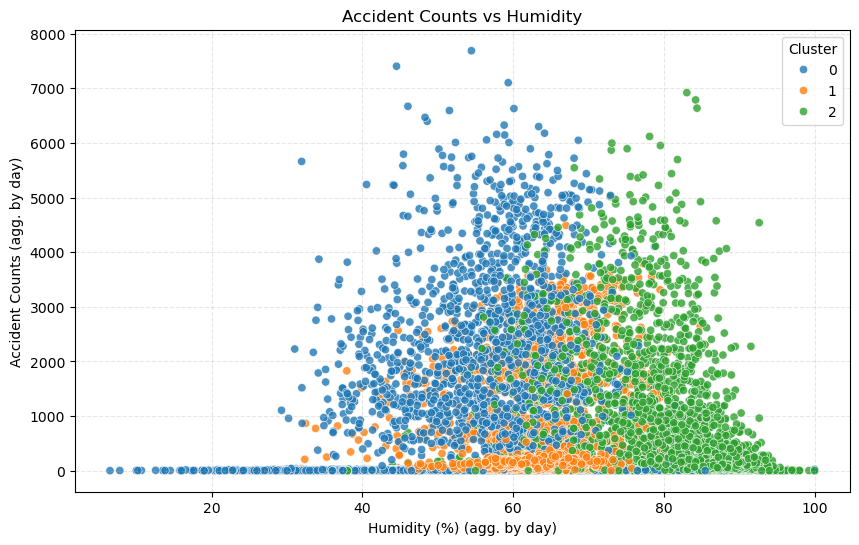

In [23]:
# Create a 'date' column
df_accidents['date'] = df_accidents['start_time'].dt.date

# Aggregate accident counts by date and cluster
daily_counts = (
    df_accidents.groupby(['date', 'clusters'])
    .size()
    .reset_index(name='accident_count')
)

# Compute average humidity per day per cluster
daily_humidity = (
    df_accidents.groupby(['date', 'clusters'])['humidity(%)']
    .mean()
    .reset_index(name='avg_humidity')
)

# Merge counts and humidity
daily_summary = pd.merge(daily_counts, daily_humidity, on=['date', 'clusters'])

# Scatter plot — Accident count vs Humidity
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=daily_summary,
    x='avg_humidity',
    y='accident_count',
    hue='clusters',
    palette='tab10',
    alpha=0.8
)

plt.title('Accident Counts vs Humidity')
plt.xlabel('Humidity (%) (agg. by day)')
plt.ylabel('Accident Counts (agg. by day)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

> The scatter plot visualizes the relationship between accident counts and humidity (aggregated by day).

>The plot suggests that accident counts are not uniformly distributed across humidity levels and that different humiditly conditions might lead to different accidents frequency pattern. 

**Accident counts vs Visibility**

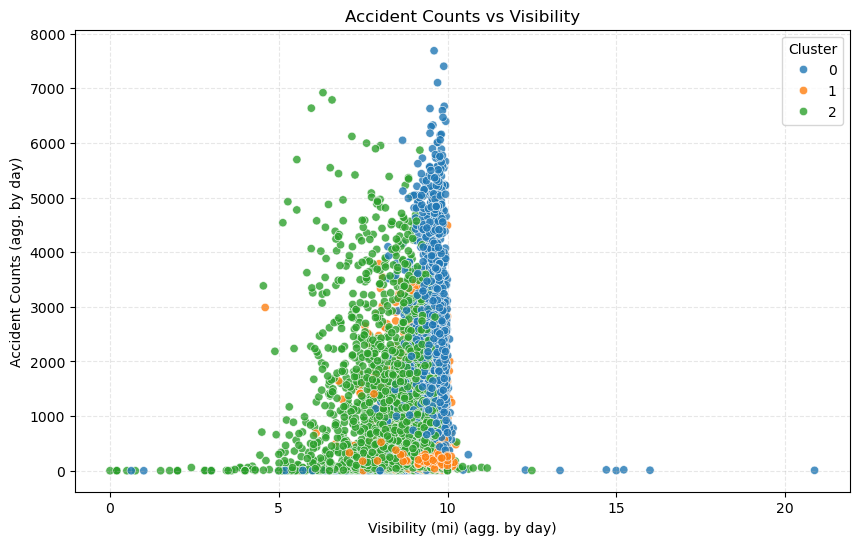

In [24]:
# Calculate average visibility per day per cluster
daily_visibility = (
    df_accidents.groupby(['date', 'clusters'])['visibility(mi)']
    .mean()
    .reset_index(name='avg_visibility')
)

# Merge counts and visibility
daily_summary_vis = pd.merge(daily_counts, daily_visibility, on=['date', 'clusters'])

# Scatterplot — Accident counts vs Visibility
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=daily_summary_vis,
    x='avg_visibility',
    y='accident_count',
    hue='clusters',
    palette='tab10',
    alpha=0.8
)

plt.title('Accident Counts vs Visibility')
plt.xlabel('Visibility (mi) (agg. by day)')
plt.ylabel('Accident Counts (agg. by day)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

> **Dominant Range of Visibility:** The vast majority of accident counts occur when average daily visibility is between approximately 5 and 11 miles. Beyond 11 miles, accident counts drop sharply to near zero, with a few sporadic low-count incidents at much higher visibility.

> **In Summary,** the periods of moderate visibility (around 5-10 miles) are associated with the highest accident frequencies, while very low or very high visibility conditions tend to have fewer accidents.

**Accident counts vs Temperature (F)**

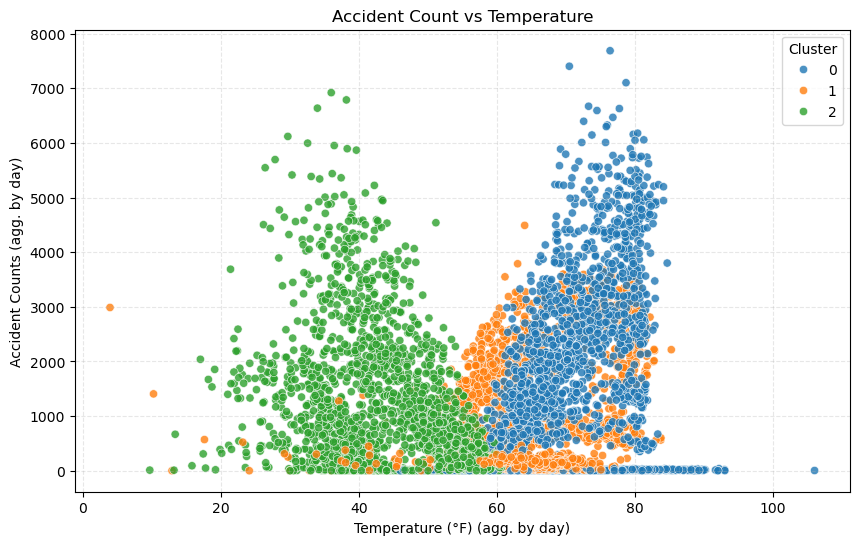

In [25]:
# Calculate average temperature per day per cluster
daily_temperature = (
    df_accidents.groupby(['date', 'clusters'])['temperature(f)']
    .mean()
    .reset_index(name='avg_temperature')
)

# Merge counts and temperature
daily_summary_temp = pd.merge(daily_counts, daily_temperature, on=['date', 'clusters'])

# Scatterplot — Accident count vs Temperature
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=daily_summary_temp,
    x='avg_temperature',
    y='accident_count',
    hue='clusters',
    palette='tab10',
    alpha=0.8
)

plt.title('Accident Count vs Temperature')
plt.xlabel('Temperature (°F) (agg. by day)')
plt.ylabel('Accident Counts (agg. by day)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

> The data clearly shows two main temperature ranges where accidents are prevalent: one in colder temperatures (roughly 20°F to 55°F) and another in warmer temperatures (roughly 60°F to 90°F).

> **In summary,** the plot indicates that accidents are significantly higher during both moderately cold (20-55°F) and moderately warm (60-90°F) periods, with relatively fewer accidents during extreme cold or heat. The clustering highlights different patterns of accident occurrence within these distinct temperature ranges.

In [26]:
# Assign the names to clusters
df_accidents.loc[df_accidents['clusters'] == 0, 'cluster'] = 'blue'
df_accidents.loc[df_accidents['clusters'] == 1, 'cluster'] = 'orange'
df_accidents.loc[df_accidents['clusters'] == 2, 'cluster'] = 'green'

In [27]:
# Compute "mean" & "median"
df_accidents.groupby('cluster').agg({'humidity(%)': ['mean', 'median'],
                                    'visibility(mi)': ['mean', 'median'],
                                    'temperature(f)': ['mean', 'median']})

humidity(%)        visibility(mi)        temperature(f)           
               mean median           mean median           mean     median
cluster                                                                   
blue      57.230198   58.0       9.585543   10.0      73.553757  73.000000
green     76.274704   80.0       8.236917   10.0      40.613480  42.000000
orange    64.266769   67.0       9.308271   10.0      67.725716  66.900002

* **0 (Blue):** Days with high humidity, moderate visibility, and cold-moderate temperatures. Associated with moderate-high accident counts.
* **2 (Green):** Days with moderate humidity, good visibility, and moderate temperatures. Showed high accident counts despite good visibility.
* **1 (Orange):** Days with low-moderate humidity, good visibility, and warm temperatures. Strongly associated with very high accident counts.
* **Summary:** Temperature is a primary differentiating factor, with "orange" indicating high accidents in cold, humid conditions. "Blue" and "green" represent different patterns in warmer temperatures (high vs. low-moderate humidity, respectively). Visibility is generally moderate to good across most high-accident clusters.

### **5. Summary**

These clusterings and insights can be useful for:
* **Cluster Profiling:** Understand accident patterns under specific temperature, visibility, and humidity ranges.
* **Feature Engineering:** Use cluster labels as categorical features in predictive models for accident risk or severity.
* **Targeted Insights:** Identify environmental conditions linked to higher accident counts for safety alerts or policy recommendations.
* **Forecasting / Scenario Analysis:** Predict expected accidents given current or simulated temperature, visibility, and humidity conditions.
* **Visualization & Dashboards:** Simplify complex environmental patterns into interpretable clusters for reporting.

In [28]:
# Export data as Pickle
df_accidents.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_accidents_6-5.pkl'))

In [29]:
# Export data as CSV
df_accidents.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'us_accidents_final.csv'), index = False)